# **4.2 PROCEDURE**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets, Sequential
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Dropout,Flatten,Dense
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#download Cifar-10 dataset
(x_train,y_train), (x_test, y_test) = datasets.cifar10.load_data()
#print the size of the dataset
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(y_train[0])
#Convert the category label into onehot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)
y_train[0]

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
[6]


array([6], dtype=uint8)

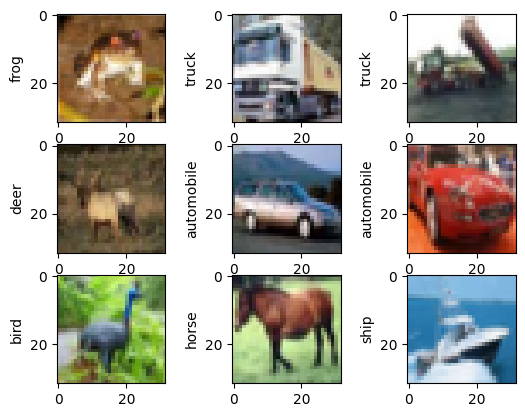

In [3]:
#Create a image tag list
category_dict = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',
                 6:'frog',7:'horse',8:'ship',9:'truck'}
#Show the first 9 images and their labels
plt.figure()
for i in range(9):
#create a figure with 9 subplots
   plt.subplot(3,3,i+1)
#show an image
   plt.imshow(x_train[i])
#show the label
   plt.ylabel(category_dict[y_train[i][0]])
plt.show()

In [4]:
#Pixel normalization
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [5]:
def CNN_classification_model(input_size = x_train.shape[1:]):
   model = Sequential()
   model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_size))   
#relu activation function
   model.add(Activation('relu'))
#Conv2
   model.add(Conv2D(32, (3, 3)))
   model.add(Activation('relu'))
#maxpooling
   model.add(MaxPooling2D(pool_size=(2, 2),strides =1))

#the second block
   model.add(Conv2D(64, (3, 3), padding='same'))
   model.add(Activation('relu'))
   model.add(Conv2D(64, (3, 3)))
   model.add(Activation('relu'))
   #maxpooling.the default strides =1
   model.add(MaxPooling2D(pool_size=(2, 2)))

#Before sending a feature map into a fully connected network, it should be flattened into a column vector.
   model.add(Flatten())
#fully connected layer
   model.add(Dense(128))
   model.add(Activation('relu'))
#dropout layer.every neuronis set to 0 with a probability of 0.25
   model.add(Dropout(0.25))
   model.add(Dense(num_classes))
#map the score of each class into probability
   model.add(Activation('softmax'))

   opt = keras.optimizers.Adam(lr=0.0001)

   model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
   return model
model=CNN_classification_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        18496     
                                                        

c:\Users\Lintang\anaconda3\envs\MS20_1\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 activation_4 (Activation)   (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 activation_5 (Activation)   (None, 10)                0         
                                                                 
Total params: 1,451,434
Trainable params: 1,451,434
Non-trainable params: 0
_________________________________________________________________


In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_name = "final_cifar10.h5"
model_checkpoint = ModelCheckpoint(model_name, monitor='loss',verbose=1, save_best_only=True)
#load pretrained models
trained_weights_path = 'cifar10_weights.h5'
if os.path.exists(trained_weights_path):
   model.load_weights(trained_weights_path, by_name =True)
#train
model.fit(x_train,y_train, batch_size=32, epochs=10,callbacks = [model_checkpoint],verbose=1)

Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 1.6652 - accuracy: 0.3960
Epoch 1: loss improved from inf to 1.66517, saving model to final_cifar10.h5
1563/1563 [==============================] - 74s 41ms/step - loss: 1.6652 - accuracy: 0.3960
Epoch 2/10
1562/1563 [============================>.] - ETA: 0s - loss: 1.3395 - accuracy: 0.5231
Epoch 2: loss improved from 1.66517 to 1.33942, saving model to final_cifar10.h5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.3394 - accuracy: 0.5232
Epoch 3/10
1560/1563 [============================>.] - ETA: 0s - loss: 1.1955 - accuracy: 0.5802
Epoch 3: loss improved from 1.33942 to 1.19543, saving model to final_cifar10.h5
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1954 - accuracy: 0.5802
Epoch 4/10
1562/1563 [============================>.] - ETA: 0s - loss: 1.0785 - accuracy: 0.6214
Epoch 4: loss improved from 1.19543 to 1.07850, saving model to final_cifar10.h5
1563/1563

In [7]:
new_model = CNN_classification_model()
new_model.load_weights('final_cifar10.h5')
model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 2s 7ms/step - loss: 0.8468 - accuracy: 0.7105


[0.8467859625816345, 0.7105000019073486]

In [8]:
#output the possibility of each class
new_model.predict(x_test[0:1])

1/1 [==============================] - 1s 1s/step


array([[1.05220685e-02, 6.31519477e-04, 3.59226130e-02, 6.55876875e-01,
        1.19188530e-02, 1.19928062e-01, 8.90315995e-02, 7.20754440e-04,
        7.44516775e-02, 9.96014685e-04]], dtype=float32)

In [9]:
#output the predicted label
predict_x = new_model.predict(x_test[0:1])
class_x = np.argmax(predict_x, axis=1)

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


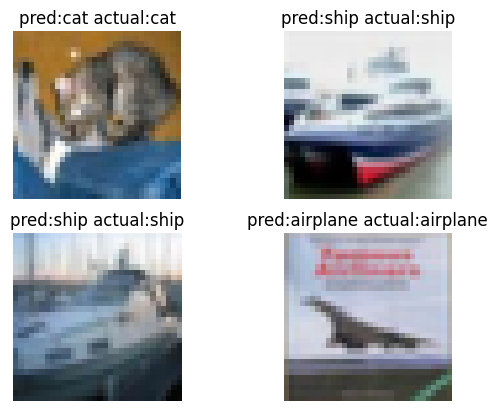

In [10]:
#label list
pred_list = []
plt.figure()
for i in range(0,4):
   plt.subplot(2,2,i+1)
#plot
   plt.imshow(x_test[i])
#predict
   pred = new_model.predict(x_test[0:10])
   classes_x = np.argmax(pred, axis=1)
   pred_list.append(classes_x)
#Display actual and predicted labels of images
   plt.title("pred:"+category_dict[classes_x[i]]+" actual:"+ category_dict[y_test[i][0]])
   plt.axis('off')
plt.show()